# Fluxo de Trabalho de Machine Learning

Neste notebook veremos com mais detalhes o fluxo de trabalho de Machine Learning com a biblioteca **Scikit-Learn**.

Abordaremos os seguintes tópicos:

1. Preparando os Dados
2. Escolhendo o melhor Modelo/Estimador/Algoritmo para os nossos problemas
3. Ajustar o Modelo e usá-lo para fazer previsões em nossos dados
4. Avaliar o desempenho do Modelo
5. Aperfeiçoar o Modelo
6. Salvar e carregar o Modelo treinado

Antes de tudo, vamos importar as bibliotecas necessárias para trabalharmos adequadamente.

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 4. Avaliando um Modelo de Machine Learning

Como sempre, para saber mais detalhes você pode checar a documentação oficial da biblioteca Scikit-Learn, nela, há uma seção específica que trata somente de métodos de avaliação de modelos.

[Avaliação de Modelos - Documentação](https://scikit-learn.org/stable/modules/model_evaluation.html)

Novamente voltaremos aos nossos dados de doença do coração (heart disease).

In [361]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

heart_disease = pd.read_csv('dados/heart-disease.csv')
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train);

Existem três principais maneiras de avaliar os modelos/estimadores de Scikit-Learn:

1. Método **score()** do estimador
2. Funções de métricas específicas para o problema
3. O parâmetro **scoring**

O método **score()** é o que estamos usando desde então.

In [362]:
clf.score(X_train, y_train)

1.0

In [363]:
clf.score(X_test, y_test)

0.819672131147541

Podemos fazer o mesmo para problemas de regressão.

In [364]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])

X = boston_df.drop('target',axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

rf = RandomForestRegressor(n_estimators=150).fit(X_train,y_train)

Uma vez que o modelo está treinado, também podemos usar o método **score()**.

In [365]:
rf.score(X_train, y_train)

0.9793735072341857

In [366]:
rf.score(X_test, y_test)

0.8458024750518687

É importante então lembrarmos que para cada algoritmo de Machine Learning (em Scikit-Learn) existe uma função padrão para avaliarmos o desempenho do modelo.

Iremos agora usar o parâmetro **scoring** para avaliar um modelo.

In [367]:
from sklearn.model_selection import cross_val_score

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier().fit(X_train, y_train);
cross_val_score(clf, X, y)

array([0.83606557, 0.8852459 , 0.80327869, 0.8       , 0.8       ])

Observe que estamos usando **Cross Validation**, o que este método faz é executar 5 **splits** diferentes em nossos dados originais e nos traz uma avaliação para cada um.

Em outras palavras, ele treina 5 versões diferentes do modelo e traz uma métrica de desempenho para cada uma.

Podemos fazer com mais versões se quisermos e tirar a média de pontuação.

Primeiramente vamos obter a pontuação de um **split único**.

In [368]:
clf_single_score = clf.score(X_test, y_test)
clf_single_score

0.7868852459016393

E agora vamos obter a média do **5-fold cross-validation score**.

In [369]:
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))
clf_cross_val_score

0.8249180327868852

Podemos ver que o parâmetro **scoring** é setado como **None** por padrão.

In [370]:
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.83606557, 0.8852459 , 0.75409836, 0.8       , 0.8       ])

Se o parâmetro **scoring** estiver como **None** ele usa o parâmetro padrão de **scoring** do nosso estimador.

O parâmetro **scoring** padrão de um classificador é **mean accuracy**.

Vamos então ver outras métricas de avaliação de algoritmos:

1. Accuracy
2. Área sob a curva ROC
3. Matriz de Confusão
4. Classification Report

Começaremos usando a métrica **Accuracy**.

In [371]:
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)
np.mean(cross_val_score)

0.8249726775956283

In [372]:
print(f'Accuracy Cross-Validated do Classificador de Doença do Coração: {np.mean(cross_val_score) * 100:.2f}%')

Accuracy Cross-Validated do Classificador de Doença do Coração: 82.50%


Vamos ver agora a métrica **Receiver Operating Characteristic Curve (AUC/ROC)**.

- Area Under Cuver (AUC)
- ROC Curve

Essencialmente ele é a comparação do modelo **True Positive Rate (TPR)** vs **False Positive Rate (FPR)**.

- True Positive = Modelo prevê 1 e a verdade é 1
- False Positive = Modelo prevê 1 e a verdade é 0
- True Negative = Modelo prevê 0 e a verdade é 0
- False Negative = Modelo prevê o e a verdade é 1

Por exemplo: 

Se um paciente tem realmente doença de coração e o algoritmo prevê que ele tem, isso significa um **True Positive**.

Se um paciente não tem doença do coração e o algoritmo prevê que ele tem, isso é um **False Positive**.

Se um paciente não tem doença do coração e o algoritmo prevê que ele não tem, isso é um **True Negative**.

E por último, se a pessoa tem a doença do coração e o algoritmo prevê que ela não tem, isso é um **False Negative**.

Para usar a métrica **ROC Curve**, é necessário primeiro importá-la.

In [373]:
from sklearn.metrics import roc_curve

Agora faremos previsões com probabilidades.

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.15, 0.85],
       [0.04, 0.96],
       [0.18, 0.82],
       [0.1 , 0.9 ],
       [0.96, 0.04],
       [0.27, 0.73],
       [0.6 , 0.4 ],
       [0.86, 0.14],
       [0.27, 0.73],
       [0.21, 0.79]])

Vamos agora selecionar apenas as probabilidades que indicam em favor de que a pessoa tem doença de coração.

In [375]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.85, 0.96, 0.82, 0.9 , 0.04, 0.73, 0.4 , 0.14, 0.73, 0.79, 0.99,
       0.91, 0.41, 0.76, 0.83, 0.03, 0.36, 0.62, 0.8 , 0.77, 0.6 , 0.42,
       0.97, 0.78, 0.81, 0.99, 0.98, 0.02, 0.43, 0.51, 0.27, 0.56, 0.65,
       0.29, 0.4 , 0.53, 0.99, 0.03, 0.79, 0.96, 0.66, 0.94, 0.26, 0.13,
       0.03, 0.09, 0.78, 0.88, 0.38, 0.42, 0.71, 0.88, 0.95, 0.76, 0.56,
       0.82, 0.04, 0.52, 0.43, 0.78, 0.11])

Agora vamos calcular o **FPR**, **TPR** tresholds.

In [376]:
fpr, tpr, tresholds = roc_curve(y_test, y_probs_positive)

Checamos então a taxa de falsos positivos.

In [377]:
fpr

array([0.        , 0.        , 0.03571429, 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.03571429, 0.07142857, 0.07142857,
       0.07142857, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.17857143, 0.21428571, 0.21428571, 0.25      , 0.32142857,
       0.35714286, 0.35714286, 0.42857143, 0.46428571, 0.5       ,
       0.53571429, 0.53571429, 0.64285714, 0.64285714, 0.78571429,
       0.85714286, 0.96428571, 1.        ])

Para compreendermos melhor este conceito, vamos criar uma função para plotar **ROC Curves**.

In [378]:
def plot_roc_curve(fpr, tpr):
    """
    Plota a ROC Curve dado o False Positive Rate (FPR)
    e True Positive Rate (TPR) de um modelo
    """
    # Plota a ROC Curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plota a linha com nenhum poder preditivo (baseline)
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='Guessing')
    # Customizando o Gráfico
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

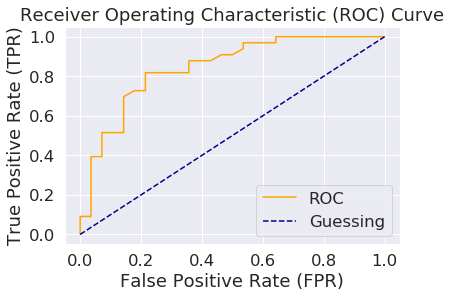

In [379]:
plot_roc_curve(fpr, tpr)

E para calcular a **Area Under Curve** usamos a função **roc_auc_score**.

In [380]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8436147186147186

Lembrando: **AUC** = Area Under Curve = Área Embaixo da Curva.

Se medirmos a área baixo da curva, obteremos um valor, sendo o máximo possível desse valor = **1**.

Vamos então plotar uma ROC Curve e AUC Score perfeito.

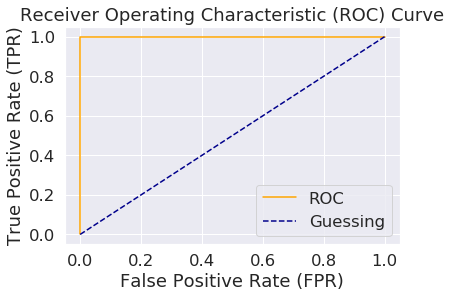

In [381]:
fpr, tpr, treshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

Para este exemplo, o AUC Score deve então ser **1**, uma vez que ele preenche a área inteira do gráfico.

In [382]:
roc_auc_score(y_test, y_test)

1.0

Agora veremos a métrica **Confusion Matrix**.

Uma **Confusion Matrix** é uma maneira rápida de comparar as labels que o modelo prevê com as labels reais que o modelo supostamente deve prever.

Em essência, nos apresenta uma ideia de onde o modelo está confuso.

In [383]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[18, 10],
       [ 4, 29]])

Recebemos um array de 4 números como **output**.

Vamos agora visualizar a Confusion Matrix para compreender melhor do que se trata.

In [384]:
pd.crosstab(y_test, y_preds, rownames=["Labels Reais"], colnames=["Labels Previstas"])

Labels Previstas,0,1
Labels Reais,,
0,18,10
1,4,29


Observe que.

In [403]:
18 + 10 + 4 + 29

61

In [386]:
len(X_test)

61

São 61 previsões no total, na intersecção entre os números podemos ver que:

- Quando uma label prevista é 0 e a label real é 0, temos 18 previsões corretas.
- Quando uma label prevista é 1 e a label real é 1, temos 29 previsões corretas.
- Quando uma label prevista é 0 e a label real é 1, temos 4 previsões incorretas. (Falso Negativo)
- Quando uma label prevista é 1 e a label real é 0, temos 10 previsões incorretas. (Falso Positivo)

Podemos tornar nossa Confusion Matrix mais intuitiva / visual através da biblioteca **seaborn**.

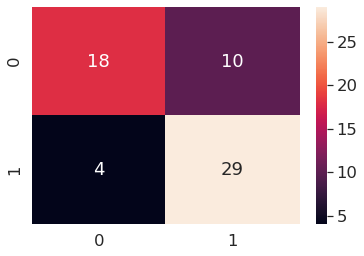

In [387]:
import seaborn as sns

# Alteramos a escala da fonte
sns.set(font_scale=1.5)

# Criamos a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plotamos usando Seaborn
sns.heatmap(conf_mat, annot=True);

Como podemos ver, ela não está muito funcional.

Vamos customizá-la criando uma função específica.

In [388]:
def plot_conf_mat(conf_mat):
    """
    Plota uma Confusion Matrix usando Seaborn Heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, annot=True, cbar=False)
    plt.xlabel('Label Verdadeira')
    plt.ylabel('Label Prevista')

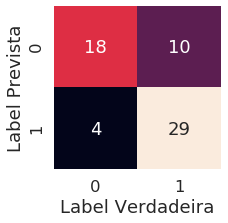

In [389]:
plot_conf_mat(conf_mat)

Por fim, temos a opção de usar a função **plot_confusion_matrix** da biblioteca Scikit-Learn.

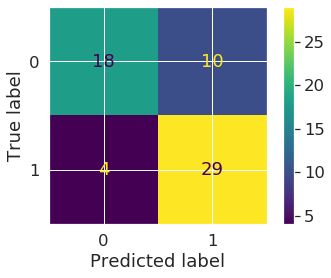

In [390]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test);

Agora veremos a métrica **Classification Report**, que é na verdade uma coleção de diferentes métricas de avaliação.

In [391]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        28
           1       0.74      0.88      0.81        33

    accuracy                           0.77        61
   macro avg       0.78      0.76      0.76        61
weighted avg       0.78      0.77      0.77        61



- **Precision**: Indica a proporção de identificações positivas (modelo previu a classe 1) no qual está de fato correta. Um modelo que produz nenhum Falso Positivo tem uma precisão **1.0**.

- **Recall**: Indica a proporção de positivos reais no qual foram corretamente classificados. Um modelo que não produz Falsos Negativos tem um recall **1.0**.

- **F1 score**: Uma combinação de precision e recall. Um modelo perfeito alcança um F1 score de **1.0**.

- **Support**: O número de amostras que cada métrica foi calculada.

- **Accuracy**: A accuracy de um modelo em forma decimal. Accuracy perfeita é igual a **1.0**.

- **Macro Avg**: A média de precision, recall e F1 score entre classes. Importante lembrar que essa métrica não considera classes não-balanceadas, portanto se você tiver classes não-balanceadas, preste atenção a essa métrica.

- **Weighted Avg**: A média ponderada de precision, recall e F1 score entre classes. Ponderada significa que cada métrica é calculada em respeito de quantas amostras há em cada classe. Essa métrica irá favorecer a classe majoritária (ou seja, irá fornecer um valor alto quando uma classe supera a outra devido a ter mais amostras).

Vamos agora testar uso de métricas em um caso específico que temos que prever se uma pessoa tem uma doença em uma amostra grande de pessoas onde há apenas de fato um doente.

In [476]:
disease_true = np.zeros(10_000)
disease_true[0] = 1 # apenas um caso positivo de doença

disease_preds = np.zeros(10_000) # o modelo prevê todo caso como 0 (negativo)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


Neste caso, o modelo está errando apenas **1**, alcançando uma accuracy de **99%**, o que pode nos enganar.

Por isso olhamos outras métricas, neste caso ele está com uma precision e recall **0** para a classe **1.0**, o que é péssimo.

Para sumarizar, temos então que:

- **Accuracy** é uma medida boa para começar se todas as classes estiverem balanceadas (mesma quantidade de amostras que estão com labels 0 e 1)
- **Precision** e **recall** se tornam mais importantes quando as classes estiverem não-balanceadas
- Se previsões falsos positivas forem pior do que falsos negativas, busque por uma precision maior
- Se previsões falsos negativas forem pior do que falsos positivas, busque por um recall maior
- **F1 Score** é uma combinação de precision e recall

Vamos agora conhecer métricas para algoritmos de **Regressão**:

1. R^2 (R-Squared) ou coefficient of determination
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

Usaremos o conjunto de dados das casas de Boston.

In [393]:
X = boston_df.drop('target',axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

modelo = RandomForestRegressor().fit(X_train, y_train);

Como de costume, podemos usar o **score()**, que traz a métrica padrão para este modelo, que no caso é **R^2**.

In [394]:
modelo.score(X_test, y_test)

0.8953964221616648

**R^2** efetivamente é uma métrica que compara as previsões do nosso modelo com a média do **target** que estamos tentando prever.

Seus valores podem variar de infinidade negativa até 1.

A seguir temos uma outra forma de calcular **R^2**.

Teremos que criar um array do tamanho de **y_test** preenchido completamente com a **média de y_test**.

In [395]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]

array([22.10098039, 22.10098039, 22.10098039, 22.10098039, 22.10098039,
       22.10098039, 22.10098039, 22.10098039, 22.10098039, 22.10098039])

Se o nosso modelo, por exemplo prever a média do target, seu **R^2** será **0**.

In [396]:
r2_score(y_test, y_test_mean)

0.0

Se o nosso modelo prever perfeitamente um intervalo de números, seu **R^2** será 1.

In [397]:
r2_score(y_test, y_test)

1.0

Agora vamos ver a métrica **Mean Absolute Error (MAE)**.

In [398]:
from sklearn.metrics import mean_absolute_error

y_preds = modelo.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.098147058823528

**MAE** é a média das diferenças absolutas entre as previsões e os valores verdadeiros, nos fornece uma ideia de quão errada as previsões de nosso modelo está.

In [399]:
df = pd.DataFrame(data={'valores verdadeiros': y_test, "valores previstos": y_preds})
df['diferenças'] = df['valores previstos'] - df['valores verdadeiros']
df.head(12)

,valores verdadeiros,valores previstos,diferenças
313,21.6,21.483,-0.117
303,33.1,33.239,0.139
217,28.7,23.959,-4.741
423,13.4,13.089,-0.311
240,22.0,27.173,5.173
35,18.9,20.453,1.553
68,17.4,19.839,2.439
468,19.1,14.584,-4.516
332,19.4,21.037,1.637
82,24.8,23.118,-1.682


Agora veremos o **Mean Squared Error (MSE)**.

In [400]:
from sklearn.metrics import mean_squared_error

y_preds = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.143367872549003

Para entendermos melhor, vamos realizar o MSE por etapas.

In [401]:
squared = np.square(df['diferenças'])
squared.mean()

9.143367872549003

Em resumo temos que:

- **R^2** é similar à accuracy. Ele nos fornece uma indicação rápida de quão bem nosso modelo está se saindo. Geralmente, quanto mais próximo R^2 está de 1.0, melhor é o modelo. Porém ele realmente não nos indica exatamente quão errado o modelo está em termos de quão distante estão as previsões.

- **MAE** nos oferece uma indicação melhor de quão distante cada uma das previsões do modelo está em média.

- Em relação a **MAE** e **MSE**, pelo fato de MSE ser calculado elevando ao quadrado as diferenças entre os valores previstos e os valores verdadeiros, ela amplifica diferenças maiores.

Devemos então minimizar MAE e MSE e maximizar R^2.

Finalmente vamos usar o parâmetro **scoring**.

In [402]:
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.85245902, 0.8852459 , 0.80327869, 0.78333333, 0.76666667])

Vejamos a **Cross-Validated Accuracy**:

In [477]:
print(f'O cross-validated accuracy é: {np.mean(cv_acc)*100:.2f}%')

O cross-validated accuracy é: 81.82%


Podemos também mudar o **scoring** padrão se desejarmos.

Vamos então alterar o padrão para **precision**.

In [478]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
np.mean(cv_precision)

0.8167134581105169

Podemos também usar **recall**.

In [479]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
np.mean(cv_recall)

0.8787878787878787

Até mesmo **F1 score**.

In [480]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
np.mean(cv_f1)

0.8442549396511205

E se estivermos trabalhando com um modelo de **Regressão**?

In [481]:
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestRegressor

X = boston_df.drop('target',axis=1)
y = boston_df['target']

regressor = RandomForestRegressor()

Lembrando que a métrica padrão para este modelo é **R^2**.

In [482]:
cv_r2 = cross_val_score(regressor, X, y, cv=5, scoring=None)
cv_r2

array([0.76942352, 0.84888297, 0.76113935, 0.46930145, 0.27413303])

Da mesma forma, podemos especificar **R^2** explicitamente.

In [483]:
cv_r2 = cross_val_score(regressor, X, y, cv=5, scoring='r2')
cv_r2

array([0.76566433, 0.85503373, 0.74609425, 0.46079437, 0.28723162])

Podemos também usar a métrica **MAE**, que vimos anteriormente.

In [484]:
cv_mae = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae

array([-2.13095098, -2.63577228, -3.39874257, -3.81921782, -3.06323762])

E por fim, podemos usar a métrica **MSE**.

In [485]:
cv_mse = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse

array([ -7.86635513, -13.81861059, -21.74322096, -47.23404905,
       -19.62399021])

Finalmente vamos fazer uma revisão usando diferentes métricas de avaliação como funções Scikit-Learn.

Começaremos avaliando um modelo de classificação.

Novamente usaremos o exemplo de doença do coração.

In [486]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier().fit(X_train, y_train);

y_preds = clf.predict(X_test)

Agora que temos o modelo e as previsões, vamos avaliar este modelo.

In [487]:
print('Métricas de Classificação no conjunto de testes')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1: {f1_score(y_test, y_preds)}')

Métricas de Classificação no conjunto de testes
Accuracy: 75.41%
Precision: 0.7428571428571429
Recall: 0.8125
F1: 0.7761194029850748


E agora revisaremos as funções de avaliação para Modelos de Regressão.

Novamente usaremos o exemplo das casas de Boston, treinando e executando previsões

In [488]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = boston_df.drop('target',axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

rf = RandomForestRegressor(n_estimators=150).fit(X_train,y_train)
y_preds = rf.predict(X_test)

E então avaliamos o modelo com as diferentes métricas.

In [489]:
print('Métricas do Modelo de Regressão no conjunto de teste')
print(f'R^2: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Métricas do Modelo de Regressão no conjunto de teste
R^2: 0.8700252942088691
MAE: 2.306568627450979
MSE: 11.61324845751635


Agora podemos ir para a pŕoxima etapa de nosso fluxo de trabalho, que é aperfeiçoar os nossos modelos.